# RQ3 : Analisi valutazioni

### Importo le librerie che mi serviranno

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

### Setup dati

In [2]:
# cartella dove ci sono i dati da analizzare
folder = "../setup_dati/"

carico i vari dataframe

In [3]:
# dataframe totale
df_all = pd.read_csv(folder+"df_all_data.csv", sep=',').drop(columns=['Unnamed: 0'])
df_all["doc_index"] = df_all["doc_index"].apply(str)


In [4]:
# dataframe sovra_categorie
'''
df_true = pd.read_csv(folder+"df_true.csv", sep=',').drop(columns=['Unnamed: 0'])
df_false = pd.read_csv(folder+"df_false.csv", sep=',').drop(columns=['Unnamed: 0'])
'''

'\ndf_true = pd.read_csv(folder+"df_true.csv", sep=\',\').drop(columns=[\'Unnamed: 0\'])\ndf_false = pd.read_csv(folder+"df_false.csv", sep=\',\').drop(columns=[\'Unnamed: 0\'])\n'

In [5]:
# dataframe sotto_categorie
'''
df_wrong_false = df_all[df_all["quartile"] == "wrong_false"]
df_correct_false = df_all[df_all["quartile"] == "correct_false"]
df_wrong_true = df_all[df_all["quartile"] == "wrong_true"]
df_correct_true = df_all[df_all["quartile"] == "correct_true"]
'''

'\ndf_wrong_false = df_all[df_all["quartile"] == "wrong_false"]\ndf_correct_false = df_all[df_all["quartile"] == "correct_false"]\ndf_wrong_true = df_all[df_all["quartile"] == "wrong_true"]\ndf_correct_true = df_all[df_all["quartile"] == "correct_true"]\n'

## Funzioni che mi serviranno 

### Funzione per visualizzare il dataframe

In [6]:
colonne_da_NON_visualizzare = ['unit_id','worker_id', 'paid', 'batch_name', 'try_last',
       'try_current', 'action', 'time_submit', 'time_submit_parsed',
       'doc_fact_check_source',
       'doc_speaker_name', 
       'doc_statement_description', 'doc_evidence_url',
       'doc_completeness_value', 'doc_completeness_label',
       'doc_completeness_index', 'doc_completeness_description',
       'doc_comprehensibility_value', 'doc_comprehensibility_label',
       'doc_comprehensibility_index', 'doc_comprehensibility_description',
       'doc_precision_value', 'doc_precision_label', 'doc_precision_index',
       'doc_precision_description', 'doc_informativeness_value',
       'doc_informativeness_label', 'doc_informativeness_index',
       'doc_informativeness_description', 'doc_unbiasedness_value',
       'doc_unbiasedness_label', 'doc_unbiasedness_index',
       'doc_unbiasedness_description', 'doc_accuracy_value',
       'doc_accuracy_label', 'doc_accuracy_index', 'doc_accuracy_description',
       "doc_speaker's-trustworthiness_value",
       "doc_speaker's-trustworthiness_label",
       "doc_speaker's-trustworthiness_index",
       "doc_speaker's-trustworthiness_description", 'doc_truthfulness_value',
       'doc_truthfulness_label', 'doc_truthfulness_index',
       'doc_truthfulness_description', 'doc_confidence_value',
       'doc_confidence_label', 'doc_confidence_index',
       'doc_confidence_description', 'doc_accesses', 'doc_time_elapsed',
       'doc_time_start', 'doc_time_end', 'global_outcome',
       'global_form_validity', 'gold_checks', 'time_spent_check',
       'time_check_amount',"task_id"]


def visualizza_dataframe(df=df_all,n=10):
       display(df.drop(colonne_da_NON_visualizzare, axis=1).head(n))

funzioni per avere solo true e false

In [7]:
def visualizza_dataframe_true(df=df_all,n=10):
       display(df[df["doc_fact_check_ground_truth_label"]=="true"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_false(df=df_all,n=10):
       display(df[df["doc_fact_check_ground_truth_label"]=="pants-on-fire"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

In [8]:
def visualizza_dataframe_correct_false(df=df_all,n=10):
       display(df[df["quartile"]=="correct_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_correct_true(df=df_all,n=10):
       display(df[df["quartile"]=="correct_true"].drop(colonne_da_NON_visualizzare, axis=1).head(n))
       
def visualizza_dataframe_wrong_false(df=df_all,n=10):
       display(df[df["quartile"]=="wrong_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

def visualizza_dataframe_correct_false(df=df_all,n=10):
       display(df[df["quartile"]=="correct_false"].drop(colonne_da_NON_visualizzare, axis=1).head(n))

### Funzioni per il test di significatività

     test di Mann-Whitney u
     
Il test di Mann-Whitney U è un test non parametrico utilizzato per confrontare due campioni indipendenti e stabilire se esiste una differenza significativa tra di essi. In particolare, il test viene utilizzato per verificare se le mediane dei due campioni sono significativamente diverse.

In [9]:
from scipy.stats import mannwhitneyu

In [10]:
# group1 e group2 sono due liste di valori
# ritorna p-value => se p-value < 0.05 allora la mediana è significativamente diversa

def test_mann_whitney_u(group1,group2):
    stat, p = mannwhitneyu(group1, group2)
    return p

    prop test => test di differenza tra due porzioni
Valuta se delle proporzioni sono uguali (p1 = p2 = p3 = .. pk) => ipotesi nulla o se esite una proporzioni significativamente diversa salle altre (ipotesi alternativa) 

In [11]:
import statsmodels.stats.proportion as ssp

In [12]:
# si applica a una specifica dimensione e si passa in input le frequenze assolute di ogni valore della dimensione

# count = particolare (wt/wf/mt/mf)
# nobs = totale di riferimento (true / false)
# ritorna p-value => se p-value < 0.05 allora c'è una proporzione significativamente diversa

def prop_test(count,nobs):
    (chi2, p, arr) = ssp.proportions_chisquare(count,nobs)
    return p

In [13]:
def prop_test_all(count,nobs):
    test_results  = ssp.proportions_chisquare_allpairs(count, nobs, multitest_method='b')
    return test_results 

    p trend test => test 
permette di verificare la presenza di una tendenza lineare tra le proporzioni(l’ipotesi nulla è che non vi sia alcuna tendenza tra di esse; l’alternativa è che vi sia un aumento/decremento lineare della proporzione man mano che si sale/scende nelle categorie. Questo test è da eseguire solo se la variabile categoriale considerata è ordinale.)

In [14]:
from scipy.stats import pearsonr

In [15]:
# tred test

def tred_test(count,nobs):
    corr, pval = corr, pval = pearsonr(count,nobs)
    return pval

### Funzioni per plot di grafici

In [16]:
# imposto dimensione delle figure e stile
custom_params = {"axes.spines.right": False, "axes.spines.top": False,'figure.figsize':(4.7,3.27)}
sns.set_theme(style="ticks", rc=custom_params)


    funzione per generare strip plot (solo puntini) con:
- y = mean della correttezza
- x = quartili
- colori = valori di una dimensione (considerata)

In [17]:
# df_sovra = True o False
# dimensione = dimensione considerata

def plot_strip_plot(df, dimensione, x_value, x_filter = None, y_value = "mean", valori_dimensione = None, order = None):
   
    if order == None:
       order = list(df[x_value].unique())
    
    if valori_dimensione is not None:
        
        tutti = df[dimensione].unique()
        da_tenere = []
        for val in tutti:
            if val not in valori_dimensione:
                da_tenere.append(val) 
                
        for val in da_tenere:
            df = df.loc[df[dimensione] != val]
    
    
    if x_filter is not None:
        diff = order.copy()
        for val in x_filter:
            
            diff.remove(val)
        for val in diff:
            df = df.loc[df[x_value] != val]
            order.remove(val)
    
    ax = sns.stripplot(y=y_value, x=x_value, data=df, hue=dimensione ,jitter=0.1, size=8, order=order, palette="Set2")
    # show the graph
    plt.title(dimensione+" "+x_value, loc="center")
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    ax.tick_params(axis='x', rotation=60)
    plt.show()

    funzione per generare un boxplot + stripplot di una dimensione di interesse:
- y = dimensione di interesse
- x = quartitli (wt,wf,ct,wt)

In [18]:
def plot_boxplot(df, dimensione):

    ax = sns.boxplot(palette = "deep",x="quartile", y=dimensione, data=df,order=['wrong_false','correct_false', 'wrong_true','correct_true'])
    
    ax = sns.stripplot(palette = ["black"],x="quartile", y=dimensione, data=df, jitter=0.1, size=8, order=['wrong_false','correct_false', 'wrong_true','correct_true'])

    # add title
    plt.title("title", loc="left")
    # show the graph
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

    funzione per creare barplot di confronto

In [19]:

from matplotlib.colors import to_rgba

def crea_barplot(raccoglitore_dimensioni,dimensione,ordine_personalizzato = None):

    fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10,6))

    fig.tight_layout(pad=5.0)
    
    for quartile in quartili:
        
        sub = raccoglitore_dimensioni[dimensione][quartile].sort_values("valore", ascending=False)
        sub_freq_rel = []
        for index, row in sub.iterrows():
            for col in ["freq_rel_quartile", "freq_rel_sovra", "freq_rel_all"]:
                new_row = [row["valore"],col, sub.at[index,col]]
                sub_freq_rel.append(new_row)

        sub_freq_rel = pd.DataFrame(sub_freq_rel, columns=["valore", "colonna", "frequenza"])
        sub_freq_rel = sub_freq_rel.sort_values(by=["valore"], ascending=True)
        
        if quartile == "wrong_false":
            i = 0
            j = 0
        elif quartile == "wrong_true":
            i = 0
            j = 1
        elif quartile == "correct_false":
            i = 1
            j = 0
        elif quartile == "correct_true":
            i = 1
            j = 1
            
        '''    
        color_dict = {'freq_rel_quartile': to_rgba('cornflowerblue', 1),
                    'freq_rel_sovra': to_rgba('grey', 0.2),
                    'freq_rel_all': to_rgba('magenta', 0.2)}   
        ''' 
        sns.barplot(data=sub_freq_rel, y = "frequenza", x = "valore", hue ="colonna", orient="v", ax=ax[i,j], palette=["g","indianred", "goldenrod"])   
        
        aplha_value = 0.35
        
        for bar, alpha in zip(ax[i,j].containers[2], list(aplha_value*np.ones(len(sub_freq_rel["valore"])))):
            bar.set_alpha(alpha)
        for bar, alpha in zip(ax[i,j].containers[0], list(aplha_value*np.ones(len(sub_freq_rel["valore"])))):
            bar.set_alpha(alpha)
        
        ax[i,j].set_title(dimensione +" - "+ quartile)
    
    # sistemo legende
    for i in range(2):
        for j in range(2):
            if i == 1 and j == 1:
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
            else:
                ax[i,j].get_legend().remove()
        
    
    
    plt.show()

     funzione per creare box plot + stripplot

In [20]:
def crea_boxplot_e_stripplot(df, x_dimensione, y_dimensione, order = ['wrong_false','other_false','correct_false', 'wrong_true','other_true','correct_true']):

    ax = sns.boxplot(palette = "pastel",x=x_dimensione, y=y_dimensione, data=df,order = order)
    ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)

    # add title
    plt.title("title", loc="left")
    ax.tick_params(axis='x', rotation=90)
    # show the graph
    plt.show()

### Funzioni di supporto

Funzione per determinare frequenza assoluta

    Funzione per determinare la frequenza assoluta
- data una dimensione da analizzare
- dato il valore di interesse

calcola la frequenza assoluta del valore rispetto al totale --> numero di occorrenze di un valore nel df

In [21]:
def calcola_frequenza_assoluta(df, dimensione, valore_dimensione, sovra_categoria):
        if sovra_categoria == 'all':
                #sub = df.drop_duplicates(subset=['doc_id'])
                sub = df
                return str(list(sub[dimensione])).count(str(valore_dimensione))
        else:
                sub = df[df['quartile'] == sovra_categoria]
                #sub = sub.drop_duplicates(subset=['doc_id'])
                return str(list(sub[dimensione])).count(str(valore_dimensione))
        

    Funzione per aggiungere un valore a una determinata colonna di una determinata riga di un dataframe 

In [22]:
# scorro df ipotizzando che il valore di doc_id sia unico

def aggiungi_valore(df,colonna,valore,doc_id):
    df.loc[df['doc_id'] == doc_id, colonna] = valore
    return df

    Ordina tabella secondo una dimensione

In [23]:
def ordina_tabella(df,dimensione,ordine):
    df = df.sort_values(by=[dimensione], ascending=ordine)
    return df

    voglio una tabella che mi dica per ogni valore considerato di una dimensione:
- frequenza assoluta del valore nella sotto categoria
- frequenza assoluta del valore nella sovra categoria
- frequenza assoluta del valore in generale (tutto)

df => df_all

In [24]:
def crea_subDF_con_frequenze(df, sovra_categoria, quartile, dimensione):
    res_assolute = []
    res_relative = []
    for valore_dimensione in df[dimensione].unique():
        freq_ass_all = calcola_frequenza_assoluta(df, dimensione, valore_dimensione, "all")
        freq_ass_sovra = calcola_frequenza_assoluta(df[df["doc_fact_check_ground_truth_label"] == sovra_categoria], dimensione, valore_dimensione, "all")
        freq_ass_quartile = calcola_frequenza_assoluta(df, dimensione, valore_dimensione, quartile)
        res_assolute.append([valore_dimensione,freq_ass_all,freq_ass_sovra,freq_ass_quartile])  
    
    res_assolute = pd.DataFrame(res_assolute, columns=["valore", "freq_ass_all", "freq_ass_sovra", "freq_ass_quartile"])     
    
    res_relative = []
    for col in res_assolute.columns[1:]:
        
        tot = res_assolute[col].sum()
        colonna = []
        for val in res_assolute[col]:
            colonna.append(val/tot)    
        res_relative.append(colonna)
            
    res_relative = pd.DataFrame(res_relative).T
    res_relative.columns = ["freq_rel_all", "freq_rel_sovra", "freq_rel_quartile"]

    sub = pd.concat([res_assolute, res_relative], axis=1, join='inner')
    return ordina_tabella(sub,"valore",True)

In [25]:
crea_subDF_con_frequenze(df_all, "pants-on-fire", "wrong_false", "doc_index")

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
2,0.0,153,30,10,0.127606,0.150754,0.20
6,1.0,146,20,4,0.121768,0.100503,0.08
3,2.0,143,19,3,0.119266,0.095477,0.06
4,3.0,154,27,4,0.128440,0.135678,0.08
7,4.0,149,21,11,0.124270,0.105528,0.22
5,5.0,152,32,9,0.126772,0.160804,0.18
0,6.0,150,23,5,0.125104,0.115578,0.10
1,7.0,152,27,4,0.126772,0.135678,0.08


    aggiungi roba al df all

In [26]:
# unisci due df tramite colonna_uguale

def aggiungi_colonna(df_totale,df_secondario, colonna,colonna_uguale_primo, colonna_uguale_secondario):
    df_totale[str(colonna)] = 1

    for index, row in df_totale.iterrows():
        id = row[str(colonna_uguale_primo)]
        df_totale.at[index,str(colonna)] = df_secondario[df_secondario[str(colonna_uguale_secondario)] == id][str(colonna)].values[0]

# Analisi

In [27]:
da_visualizzare = ["doc_id","sovra","quartile","mean","doc_truthfulness_index","doc_completeness_index","doc_comprehensibility_index","doc_precision_index","doc_informativeness_index","doc_unbiasedness_index","doc_accuracy_index","doc_speaker's-trustworthiness_index","doc_confidence_index"]

In [28]:
dimensioni_da_analizzare = ["doc_completeness_index","doc_comprehensibility_index","doc_precision_index","doc_informativeness_index","doc_unbiasedness_index","doc_accuracy_index","doc_speaker's-trustworthiness_index","doc_confidence_index"]
quartili = ["wrong_false", "correct_false", "wrong_true", "correct_true"]


In [29]:
df_all["doc_id"].unique()

array(['joni-ernst-target-describing-11th-hour-obama-rule-',
       'gop-challenger-overstates-parole-boards-record-und',
       'greene-twists-logic-and-facts-pedophilia-charge-ag',
       'barnes-partially-right-claim-johnson-has-received-',
       'david-jolly-says-kathleen-peters-wont-take-stand-r',
       'john-boehner-says-stimulus-bill-was-rushed-passage',
       'ron-desantis-exaggerates-outstanding-graduate-stud',
       'ohios-mandel-repeats-false-claim-stolen-2020-elect',
       'lauren-boebert-wrong-founding-fathers-intent-exper',
       'hard-pin-down-growing-cost-unused-border-materials',
       'yes-tax-break-ron-johnson-pushed-2017-has-benefite',
       'suozzi-calling-hochul-interim-governor-s-misleadin',
       'fact-checking-claim-about-number-immigrants-becomi',
       'nikki-frieds-ad-misleads-crists-position-abortion-',
       'marjorie-taylor-greene-shared-edited-image-highlan',
       'virginia-975-abortions-occur-15-weeks-pregnancy-or',
       'susan-collins-sa

In [30]:
df_all[df_all["doc_id"] == "joni-ernst-target-describing-11th-hour-obama-rule-"][da_visualizzare]

,doc_id,sovra,quartile,mean,doc_truthfulness_index,doc_completeness_index,doc_comprehensibility_index,doc_precision_index,doc_informativeness_index,doc_unbiasedness_index,doc_accuracy_index,doc_speaker's-trustworthiness_index,doc_confidence_index
0,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,4.0,1.0,3.0,1.0,2.0,1.0,3.0,2.0,3.0
11,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,4.0,4.0,4.0,3.0,3.0,0.0,3.0,0.0,4.0
111,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,1.0,4.0,4.0,4.0,4.0,0.0,0.0,0.0,4.0
163,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,4.0,4.0,4.0,3.0,4.0,3.0,3.0,4.0,3.0
340,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,3.0,3.0,4.0,3.0,2.0,1.0,3.0,1.0,3.0
420,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,4.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,3.0
466,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
621,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,2.0,2.0,3.0,2.0,3.0,2.0,2.0,2.0,1.0
710,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,4.0,3.0,3.0,2.0,3.0,2.0,2.0,2.0,4.0
921,joni-ernst-target-describing-11th-hour-obama-r...,other,other,3.4,4.0,3.0,3.0,2.0,2.0,3.0,3.0,3.0,1.0


### Rapporto tra frequenze relative

In [31]:
# definisco un dizionario che conterrà i df delle dimensioni
raccoglitore_dimensioni = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_dimensioni[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # set sovra
        if quartile == "wrong_false" or quartile == "correct_false":
            sovra = "pants-on-fire"
        else:
            sovra = "true"
        
        # creo il df
        raccoglitore_dimensioni[dimensione][quartile]=crea_subDF_con_frequenze(df_all, sovra, quartile, dimensione)

In [32]:
# esempio di accesso al df
raccoglitore_dimensioni["doc_completeness_index"]["correct_true"]

,valore,freq_ass_all,freq_ass_sovra,freq_ass_quartile,freq_rel_all,freq_rel_sovra,freq_rel_quartile
1,0.0,92,4,1,0.076731,0.020,0.016667
0,1.0,216,29,4,0.180150,0.145,0.066667
3,2.0,108,9,2,0.090075,0.045,0.033333
4,3.0,370,59,21,0.308590,0.295,0.350000
2,4.0,413,99,32,0.344454,0.495,0.533333


In [33]:
# definisco un dizionario che conterrà i df dei p-value
raccoglitore_pvalue = {}

# inizializzo il dizionario
for dimensione in dimensioni_da_analizzare:
    raccoglitore_pvalue[dimensione] = {}

for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        
        # estraggo le frequenze assolute dal dizionario raccoglitore_dimensioni
        
        freq_ass_quartile = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_quartile"]
        freq_ass_all = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_all"]
        freq_ass_sovra = raccoglitore_dimensioni[dimensione][quartile]["freq_ass_sovra"]
        
        # calcolo i p-value
        
        p_value_quartile_all = prop_test(freq_ass_quartile,freq_ass_all)
        p_value_sovra_all = prop_test(freq_ass_sovra,freq_ass_all)
        
        # per calculare il p-value del quartile rispetto alla sovra categoria devo eliminare i valori 0 => poichè ci possono essere valori che non ci sono ne nel quartile ne nella sovra categoria
        
        for i in range(0,len(freq_ass_sovra)):
            if freq_ass_sovra[i] == 0 or freq_ass_sovra[i] == "0":
                freq_ass_sovra.pop(i)
                freq_ass_quartile.pop(i)
            
        p_value_quartile_sovra = prop_test(freq_ass_quartile,freq_ass_sovra)
        
        # creo row
        
        row = [[p_value_quartile_all,
              p_value_quartile_sovra,
              p_value_sovra_all
        ]]
        
        # creo il df
        
        raccoglitore_pvalue[dimensione][quartile] = pd.DataFrame(row, columns=["pvalue_quartile_all", "pvalue_quartile_sovra", "pvalue_sovra_all"])

In [34]:
significativi = []
for dimensione in dimensioni_da_analizzare:
    for quartile in quartili:
        for val in raccoglitore_pvalue[dimensione][quartile]:
            if raccoglitore_pvalue[dimensione][quartile][val][0] < 0.05:
                row = [dimensione, quartile, val, raccoglitore_pvalue[dimensione][quartile][val][0]]
                significativi.append(row)
significativi = pd.DataFrame(significativi, columns=["dimensione", "quartile", "confronto", "valore_pvalue"])
significativi = significativi[significativi["confronto"] == "pvalue_quartile_sovra"].sort_values(by=["valore_pvalue"], ascending=True)

In [35]:
significativi["dimensione"].unique()

array(['doc_unbiasedness_index', "doc_speaker's-trustworthiness_index",
       'doc_informativeness_index', 'doc_accuracy_index',
       'doc_confidence_index', 'doc_precision_index',
       'doc_comprehensibility_index'], dtype=object)

In [36]:
len(significativi["dimensione"].unique())

7

Dimensioe = 

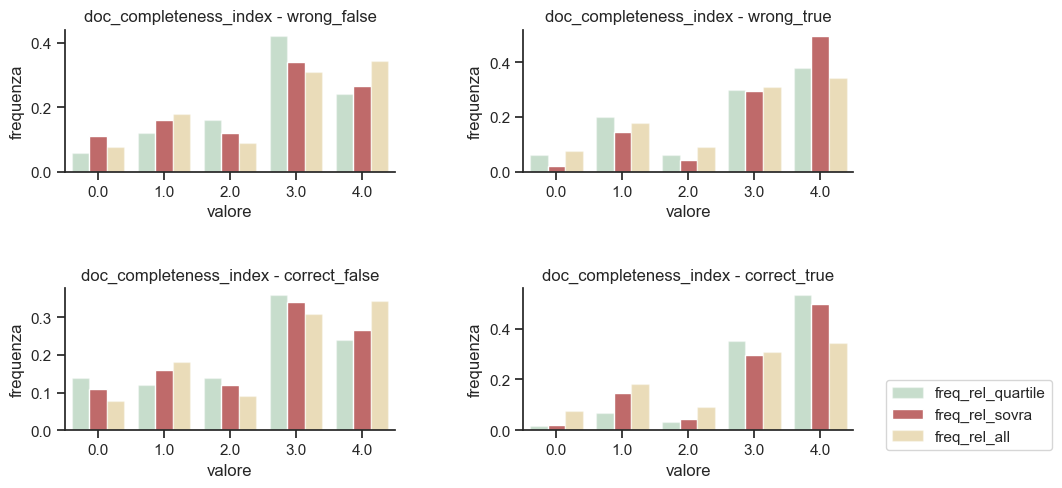

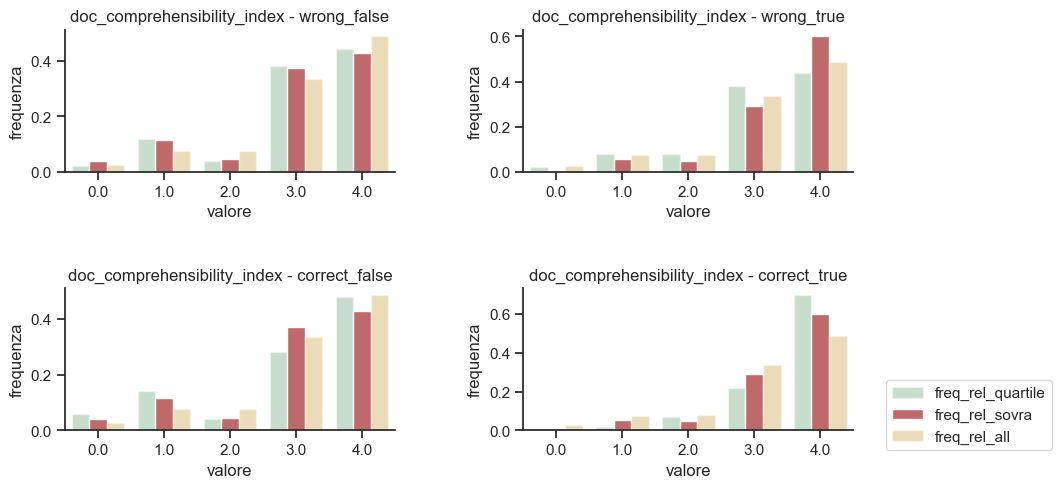

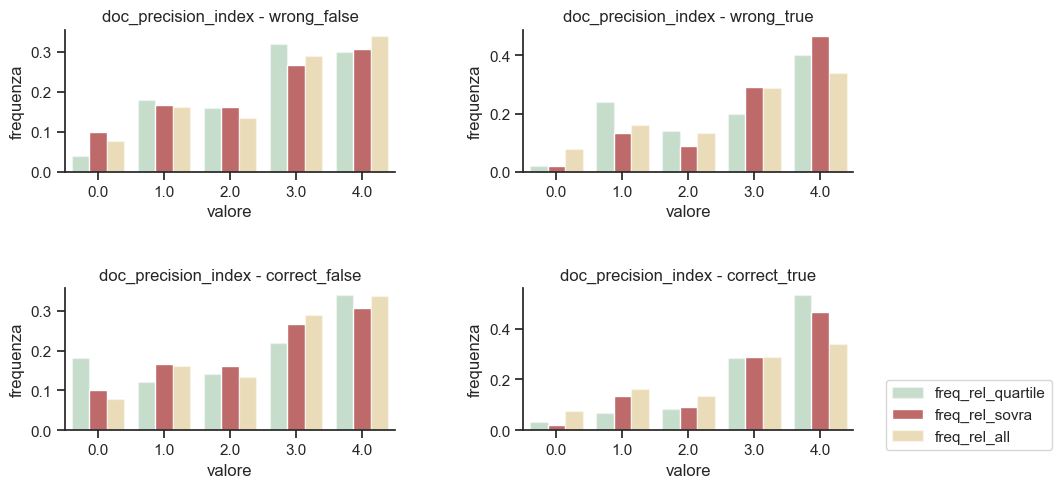

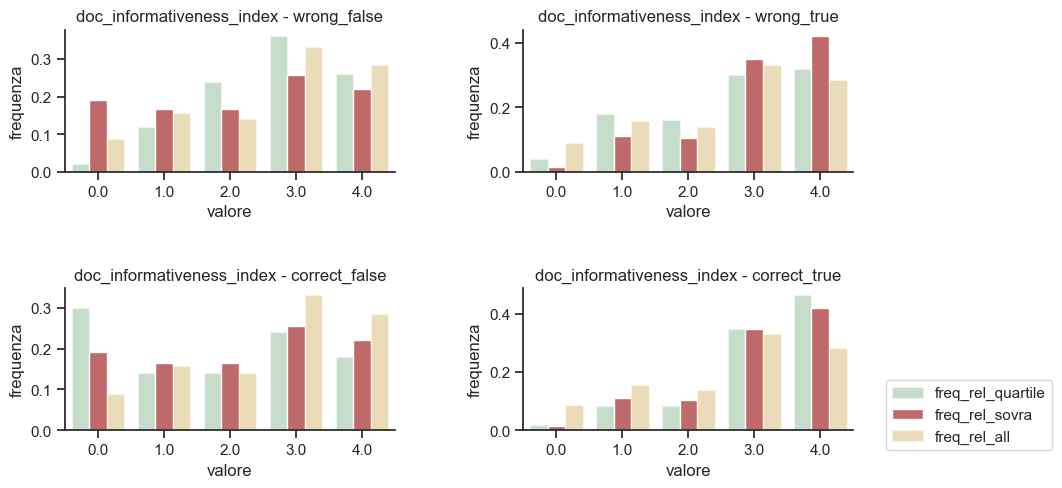

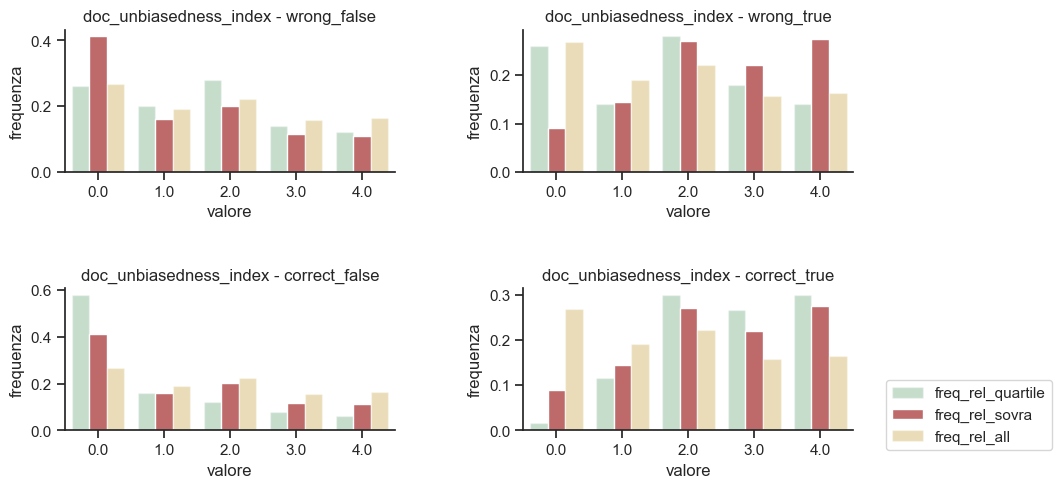

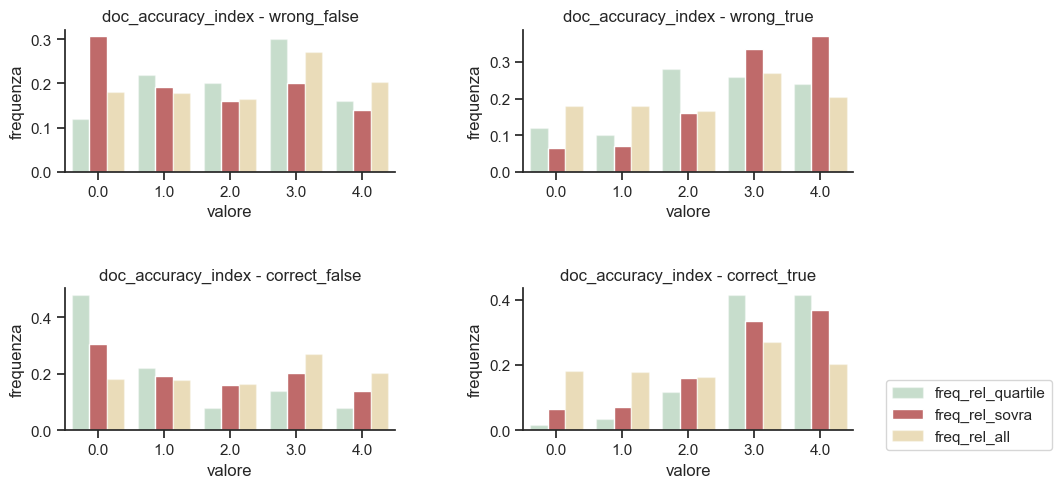

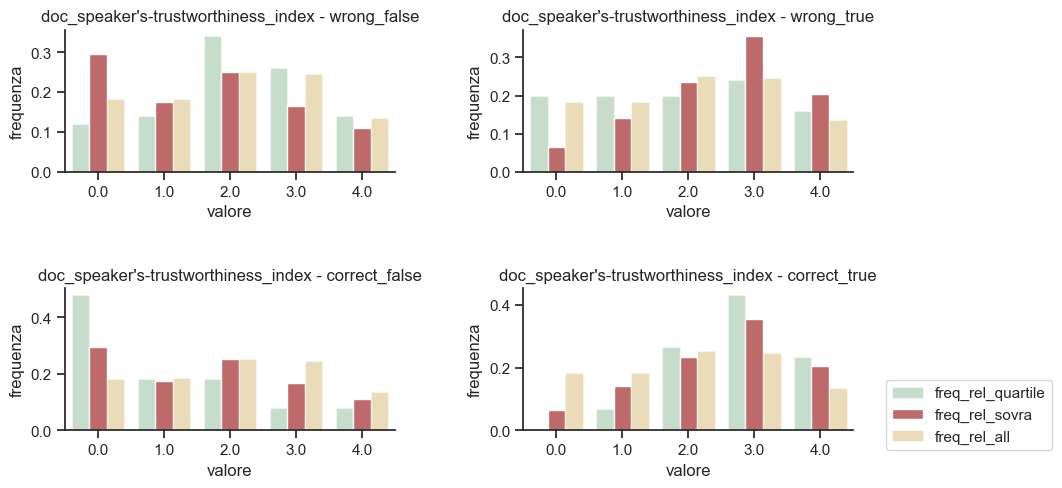

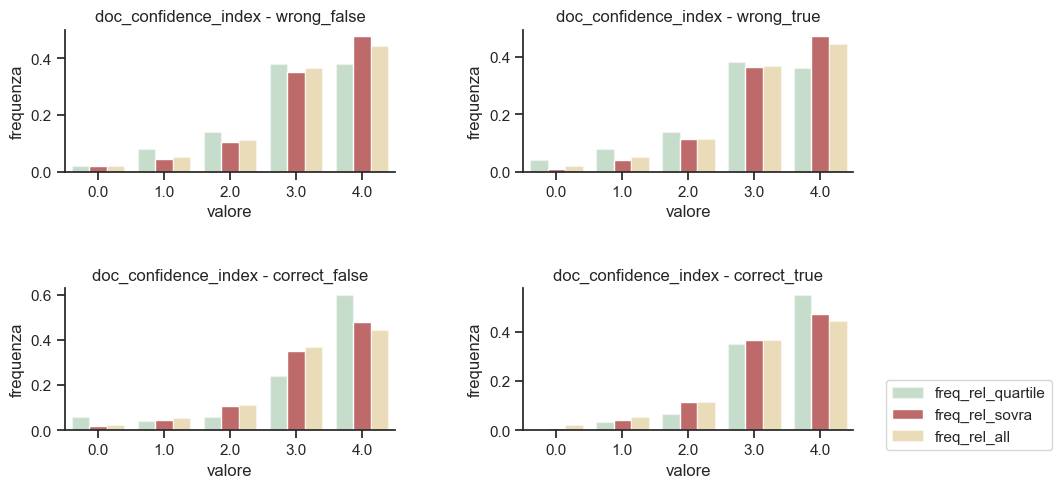

In [42]:
for dimensione in dimensioni_da_analizzare:
    crea_barplot(raccoglitore_dimensioni, dimensione)

In [630]:
# definisco un ordine per la visualizzazione dei quartili
ordine = ["wrong_false", "correct_false","wrong_true","correct_true"]

In [631]:
df_all[df_all["quartile"] == "wrong_false"]["doc_id"].unique()

array(['greene-twists-logic-and-facts-pedophilia-charge-ag',
       'ohios-mandel-repeats-false-claim-stolen-2020-elect',
       'jd-vance-says-transgender-rights-drives-looming-co',
       'common-core-testing-homosexual-possibly-can',
       'no-these-mass-shootings-werent-plot-protect-hillar'], dtype=object)

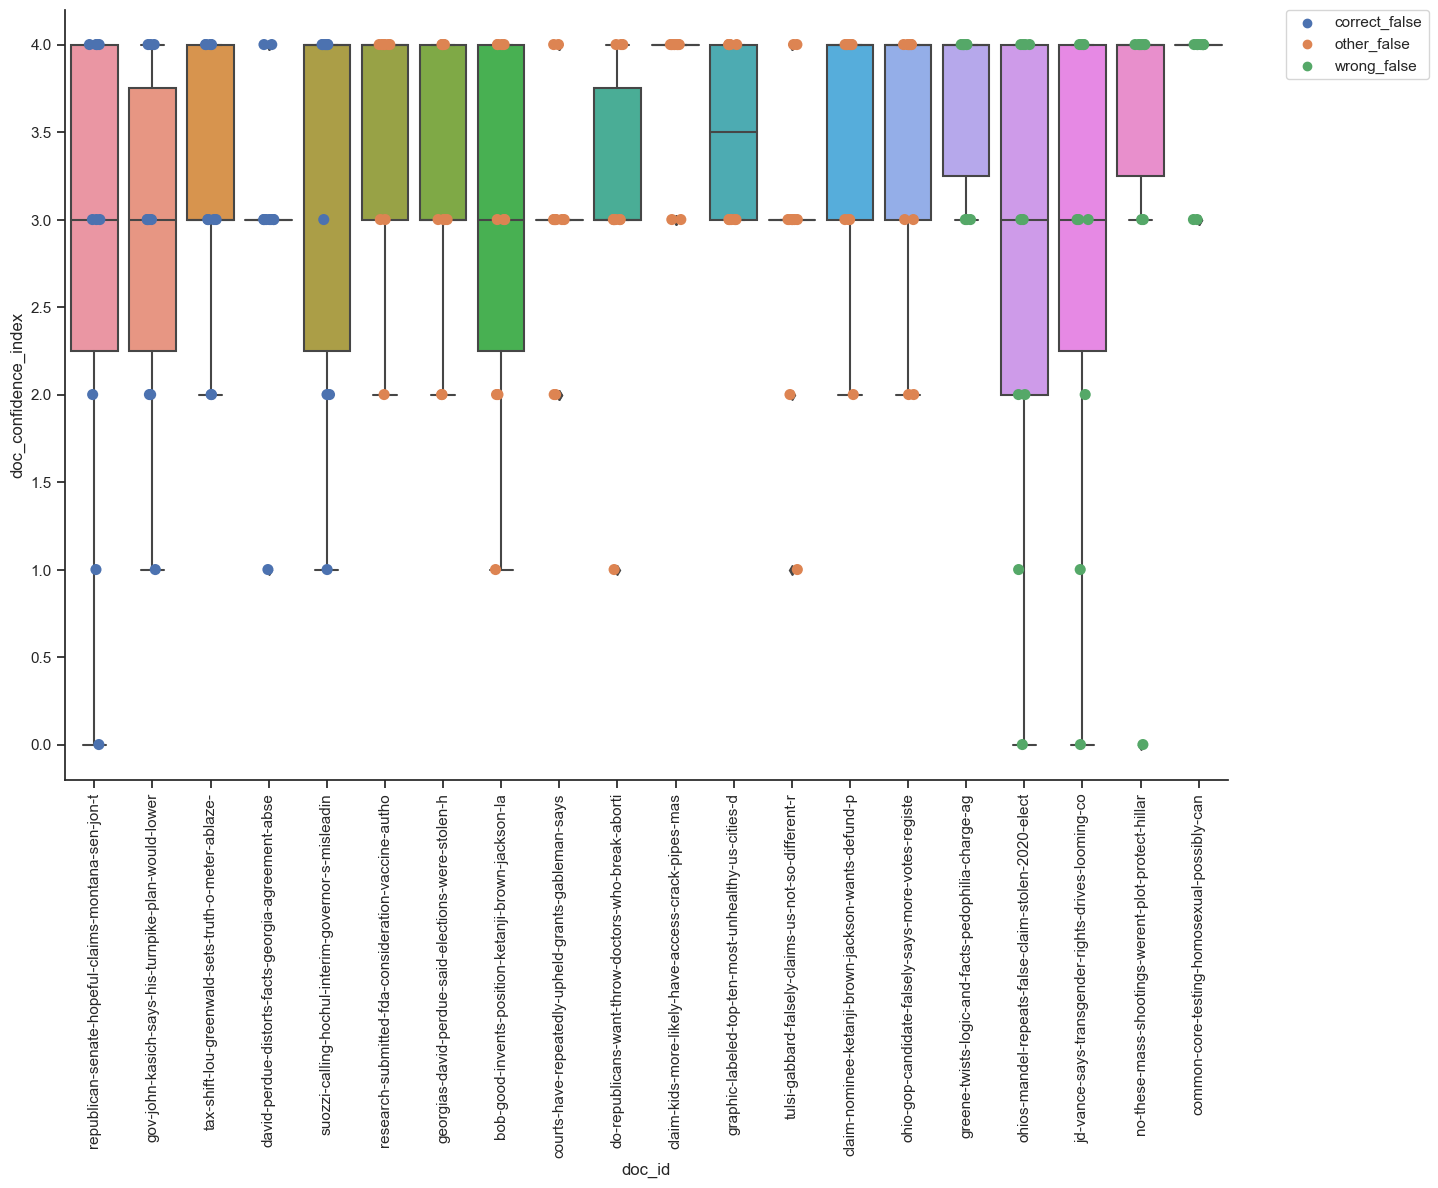

In [632]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="doc_id", y=dimensione, data=df_all[df_all["sovra"]=="pants-on-fire"].sort_values(by=["quartile"], ascending=True))
ax = sns.stripplot(x="doc_id", y=dimensione, data=df_all[df_all["sovra"]=="pants-on-fire"].sort_values(by=["quartile"], ascending=True),hue="quartile", jitter=0.1, size=8)
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

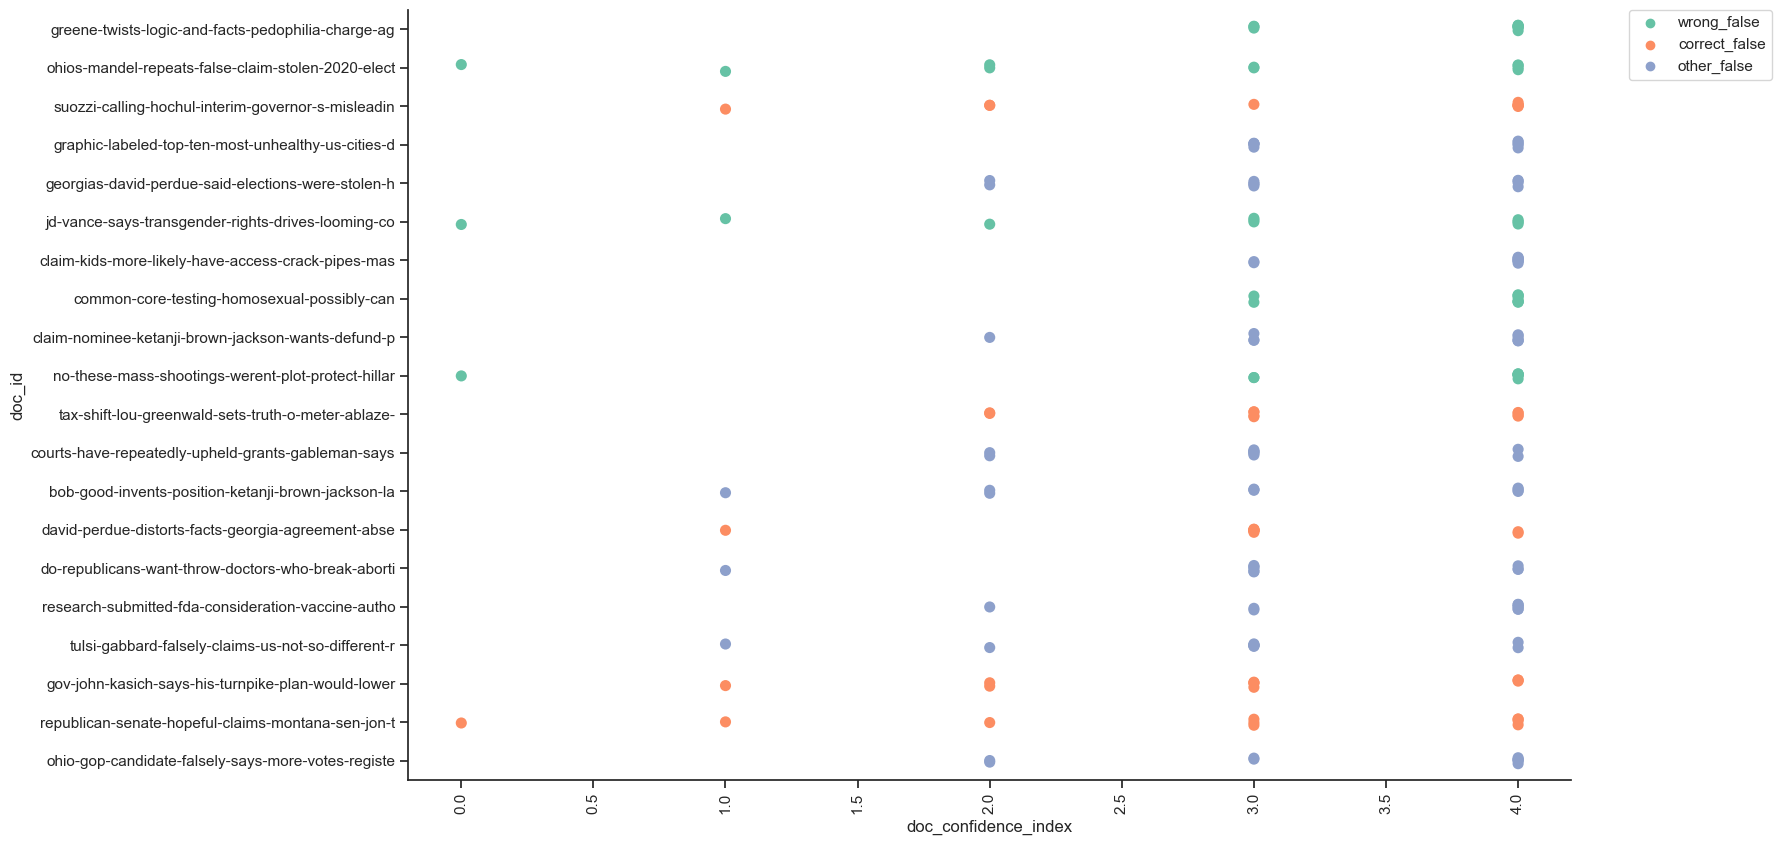

In [633]:
plt.figure(figsize=(15,10))
ax = sns.stripplot( y="doc_id", x=dimensione, data=df_all[df_all["sovra"]=="pants-on-fire"],hue = "quartile",jitter=0.1, size=8, palette="Set2")
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [634]:
df_all[df_all["doc_id"] == "greene-twists-logic-and-facts-pedophilia-charge-ag"][da_visualizzare]

,doc_id,sovra,quartile,mean,doc_truthfulness_index,doc_completeness_index,doc_comprehensibility_index,doc_precision_index,doc_informativeness_index,doc_unbiasedness_index,doc_accuracy_index,doc_speaker's-trustworthiness_index,doc_confidence_index
2,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,1.0,0.0,4.0,0.0,1.0,0.0,2.0,1.0,4.0
114,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,0.0,4.0,4.0,4.0,4.0,2.0,4.0,1.0,4.0
120,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,0.0,2.0,4.0,4.0,2.0,0.0,0.0,0.0,4.0
283,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,1.0,2.0,2.0,3.0,2.0,0.0,2.0,1.0,3.0
479,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,4.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0
511,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,1.0,3.0,3.0,2.0,3.0,0.0,1.0,0.0,4.0
589,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,0.0,3.0,3.0,3.0,3.0,0.0,1.0,0.0,4.0
616,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,0.0,1.0,3.0,2.0,0.0,4.0,0.0,0.0,4.0
702,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,4.0,3.0,4.0,4.0,4.0,2.0,3.0,3.0,4.0
973,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,wrong_false,1.2,1.0,2.0,2.0,2.0,1.0,1.0,1.0,2.0,3.0


## regressione

calcolo medie

In [635]:
df_all_con_medie = df_all.copy()

In [636]:
dimensioni_da_analizzare = dimensioni_da_analizzare + ["doc_time_elapsed"]

In [637]:
dimensioni_da_analizzare

['doc_completeness_index',
 'doc_comprehensibility_index',
 'doc_precision_index',
 'doc_informativeness_index',
 'doc_unbiasedness_index',
 'doc_accuracy_index',
 "doc_speaker's-trustworthiness_index",
 'doc_confidence_index',
 'doc_time_elapsed']

In [638]:
#sub = df_all[df_all["sovra"] != "other"]
sub = df_all
for dimensione in dimensioni_da_analizzare:
    sub[dimensione[:-6]+"_mean"] = 0
    da_visualizzare.append(dimensione[:-6]+"_mean")

for statement in sub["doc_id"].unique():
    #sovra = sub[sub["doc_id"] == statement]["sovra"].unique()[0]  
    for dim in dimensioni_da_analizzare:
        mean = np.asarray(sub[sub["doc_id"] == statement][dim],dtype = np.float64).mean()
        df_all_con_medie.loc[df_all_con_medie["doc_id"] == statement, dim[:-6]+"_mean"] = mean 

In [639]:
df_all_con_medie.columns

Index(['worker_id', 'paid', 'task_id', 'batch_name', 'unit_id', 'try_last',
       'try_current', 'action', 'time_submit', 'time_submit_parsed',
       'doc_index', 'doc_id', 'doc_fact_check_ground_truth_label',
       'doc_fact_check_ground_truth_value', 'doc_fact_check_source',
       'doc_speaker_name', 'doc_speaker_party', 'doc_statement_date',
       'doc_statement_description', 'doc_statement_text', 'doc_evidence_url',
       'doc_completeness_value', 'doc_completeness_label',
       'doc_completeness_index', 'doc_completeness_description',
       'doc_comprehensibility_value', 'doc_comprehensibility_label',
       'doc_comprehensibility_index', 'doc_comprehensibility_description',
       'doc_precision_value', 'doc_precision_label', 'doc_precision_index',
       'doc_precision_description', 'doc_informativeness_value',
       'doc_informativeness_label', 'doc_informativeness_index',
       'doc_informativeness_description', 'doc_unbiasedness_value',
       'doc_unbiasedness_labe

In [640]:
df_all_con_medie["doc_id"].unique()

array(['joni-ernst-target-describing-11th-hour-obama-rule-',
       'gop-challenger-overstates-parole-boards-record-und',
       'greene-twists-logic-and-facts-pedophilia-charge-ag',
       'barnes-partially-right-claim-johnson-has-received-',
       'david-jolly-says-kathleen-peters-wont-take-stand-r',
       'john-boehner-says-stimulus-bill-was-rushed-passage',
       'ron-desantis-exaggerates-outstanding-graduate-stud',
       'ohios-mandel-repeats-false-claim-stolen-2020-elect',
       'lauren-boebert-wrong-founding-fathers-intent-exper',
       'hard-pin-down-growing-cost-unused-border-materials',
       'yes-tax-break-ron-johnson-pushed-2017-has-benefite',
       'suozzi-calling-hochul-interim-governor-s-misleadin',
       'fact-checking-claim-about-number-immigrants-becomi',
       'nikki-frieds-ad-misleads-crists-position-abortion-',
       'marjorie-taylor-greene-shared-edited-image-highlan',
       'virginia-975-abortions-occur-15-weeks-pregnancy-or',
       'susan-collins-sa

In [641]:
df_all_con_medie[["doc_id","sovra","mean","doc_completeness_index","doc_completeness_mean"]]

,doc_id,sovra,mean,doc_completeness_index,doc_completeness_mean
0,joni-ernst-target-describing-11th-hour-obama-r...,other,3.4,1.0,3.1
1,gop-challenger-overstates-parole-boards-record...,other,1.4,0.0,2.0
2,greene-twists-logic-and-facts-pedophilia-charg...,pants-on-fire,1.2,0.0,2.4
3,barnes-partially-right-claim-johnson-has-recei...,other,2.6,0.0,1.9
4,david-jolly-says-kathleen-peters-wont-take-sta...,other,2.7,1.0,2.2
...,...,...,...,...,...
1194,fact-checking-bernie-sanders-attack-florida-go...,other,2.1,1.0,2.5
1195,marjorie-taylor-greene-shared-edited-image-hig...,other,1.1,3.0,2.6
1196,some-teachouts-donors-also-gave-super-pacs,true,3.2,4.0,2.7
1197,ron-desantis-exaggerates-outstanding-graduate-...,other,2.6,4.0,2.8


In [642]:
len(dimensioni_da_analizzare)

9

doc_completeness_index
doc_comprehensibility_index
doc_precision_index
doc_informativeness_index
doc_unbiasedness_index
doc_accuracy_index
doc_speaker's-trustworthiness_index
doc_confidence_index
doc_time_elapsed


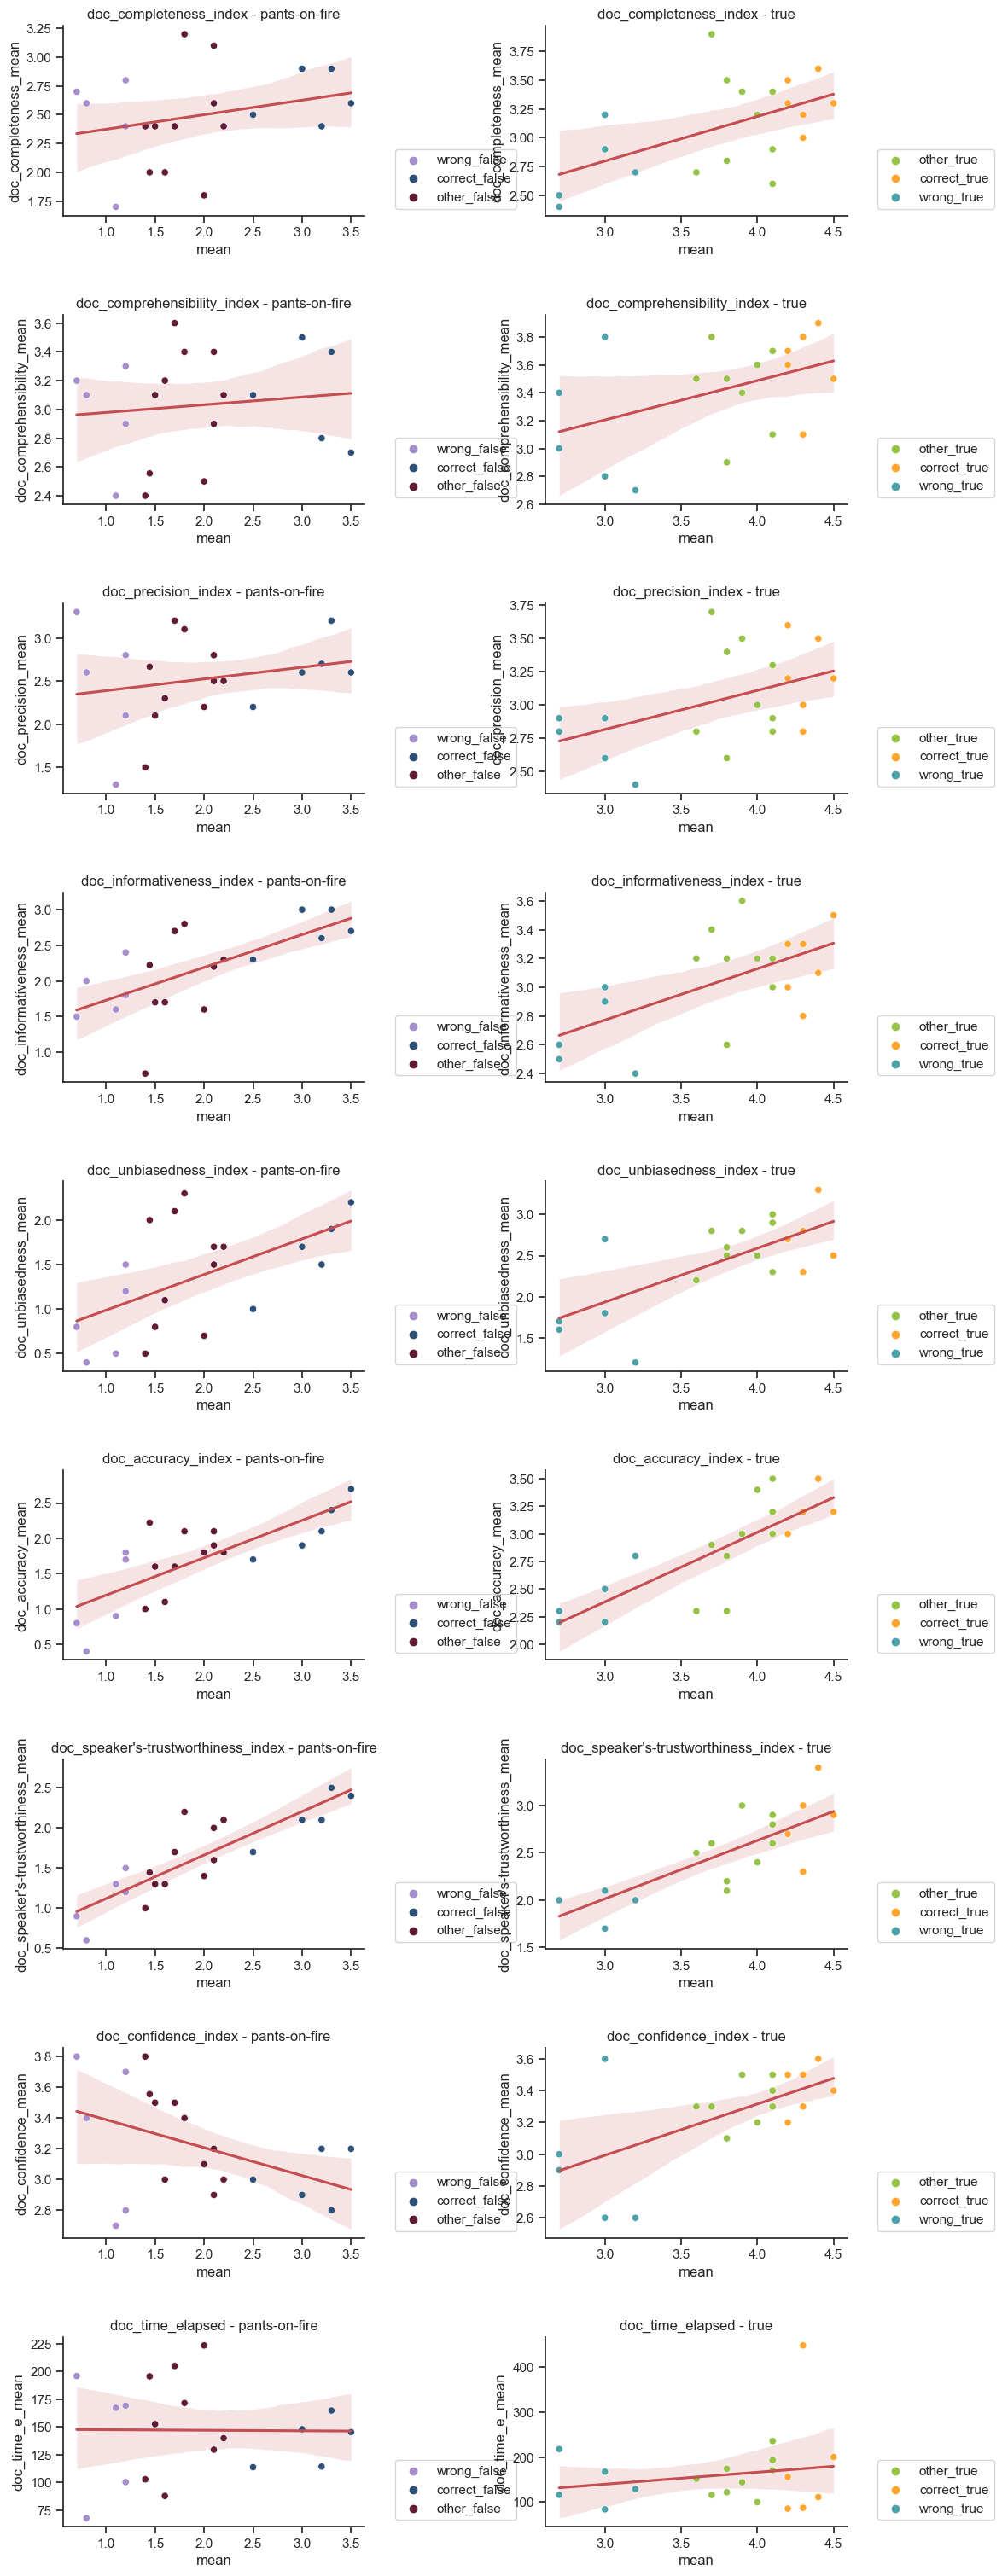

In [661]:
fig, ax = plt.subplots(9,2,figsize=(10,30))

fig.tight_layout(h_pad=5.0, w_pad=10.0)

i = -1

for dimensione in dimensioni_da_analizzare:
        print(dimensione)
        i += 1        
        for sovra in ["pants-on-fire","true"]:
                
                if sovra == "true":
                        j = 1
                else:
                        j = 0
                        
                                
                sub = df_all_con_medie[df_all_con_medie["doc_fact_check_ground_truth_label"] == sovra]
                
                test = { "correct_true" : "#FFA630",
                        "other_true": "#95C247",
                        "wrong_true": "#4DA1A9",
                        "correct_false" : "#2E5077",
                        "other_false": "#611C35",
                        "wrong_false": "#A68DCC"
                        
                }
                
                sns.regplot(x="mean", 
                                y=sub[dimensione[:-6]+"_mean"], 
                                data=sub,
                                ax=ax[i,j],
                                scatter_kws={'s':0},
                                color="r"
                                )
                
                sns.scatterplot(x="mean", 
                                y=sub[dimensione[:-6]+"_mean"], 
                                hue = "quartile",
                                palette=test,
                                data=sub,
                                ax=ax[i,j],
                                )
                ax[i,j].set_title(str(dimensione) + " - " + sovra)
                ax[i,j].legend(bbox_to_anchor=(1.1, 0.35), loc='upper left', borderaxespad=0)
                
               
plt.show()

## analisi su medie

ora posso fare un drop rispetto al doc_id

In [644]:
df_all_con_medie = df_all_con_medie.drop_duplicates(subset=["doc_id"])

In [645]:
def calcola_test_mann(df, col):
    for quartile in quartili:
        
        count = df[df["quartile"] == quartile][col]
        group1 = df[df["quartile"] == quartile]["quartile"].unique()
               
        if quartile == "correct_true" or quartile == "wrong_true":
            sovra = "true"
        else:
            sovra = "pants-on-fire"
        
        group2 = df_all_con_medie[(df_all_con_medie["sovra"] == sovra) & (df_all_con_medie["quartile"] != quartile)]["quartile"].unique()
        nobs = df_all_con_medie[(df_all_con_medie["sovra"] == sovra) & (df_all_con_medie["quartile"] != quartile)][col]
        
        print(group1,group2,test_mann_whitney_u(count,nobs))

C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


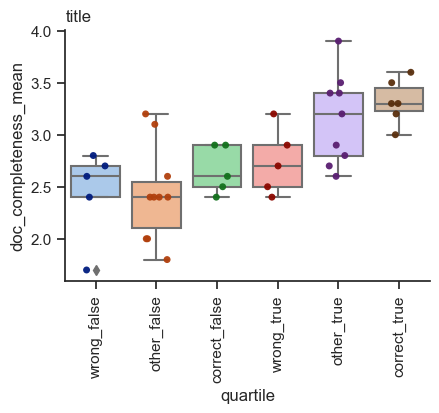

['wrong_false'] ['correct_false' 'other_false'] 1.0
['correct_false'] ['wrong_false' 'other_false'] 0.23131802402762947
['wrong_true'] ['other_true' 'correct_true'] 0.022775246472204125
['correct_true'] ['other_true' 'wrong_true'] 0.0978875967667731


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


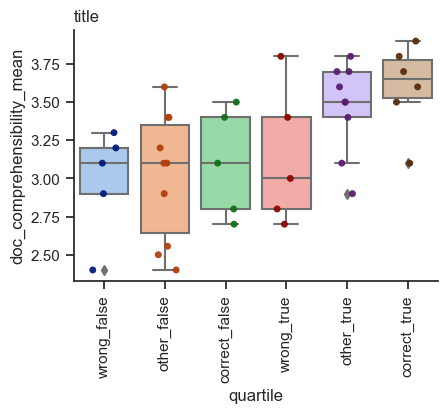

['wrong_false'] ['correct_false' 'other_false'] 0.7252870469285946
['correct_false'] ['wrong_false' 'other_false'] 0.6926016842589904
['wrong_true'] ['other_true' 'correct_true'] 0.08693725437422029
['correct_true'] ['other_true' 'wrong_true'] 0.1466171681426579


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


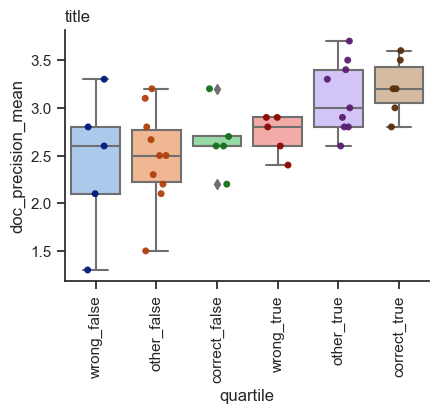

['wrong_false'] ['correct_false' 'other_false'] 0.9302073226749237
['correct_false'] ['wrong_false' 'other_false'] 0.5398181731034122
['wrong_true'] ['other_true' 'correct_true'] 0.02801351047923887
['correct_true'] ['other_true' 'wrong_true'] 0.15803185759830296


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


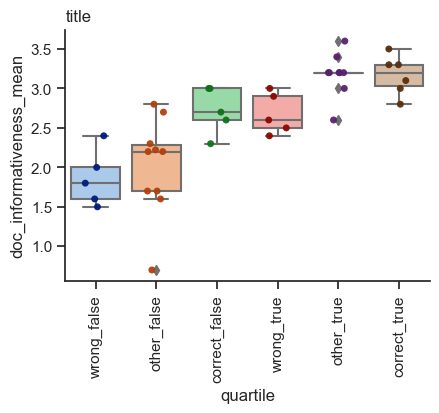

['wrong_false'] ['correct_false' 'other_false'] 0.1257737229351158
['correct_false'] ['wrong_false' 'other_false'] 0.008676574555266471
['wrong_true'] ['other_true' 'correct_true'] 0.005489336032556002
['correct_true'] ['other_true' 'wrong_true'] 0.3381064853167167


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


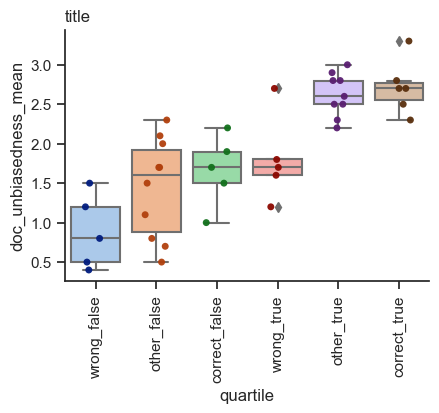

['wrong_false'] ['correct_false' 'other_false'] 0.04388424167586997
['correct_false'] ['wrong_false' 'other_false'] 0.21995780926907704
['wrong_true'] ['other_true' 'correct_true'] 0.010965695347348581
['correct_true'] ['other_true' 'wrong_true'] 0.24589187893387054


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


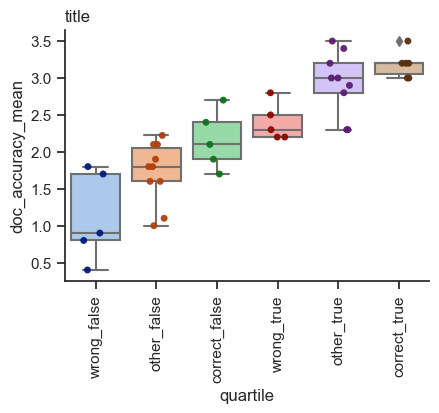

['wrong_false'] ['correct_false' 'other_false'] 0.020193399582286702
['correct_false'] ['wrong_false' 'other_false'] 0.03541257323500787
['wrong_true'] ['other_true' 'correct_true'] 0.005471371212327988
['correct_true'] ['other_true' 'wrong_true'] 0.03359633447328456


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


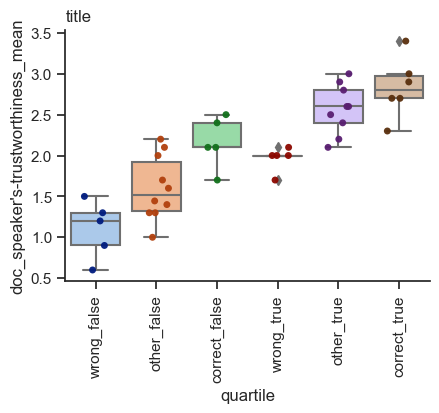

['wrong_false'] ['correct_false' 'other_false'] 0.011087279266293095
['correct_false'] ['wrong_false' 'other_false'] 0.007555541061958831
['wrong_true'] ['other_true' 'correct_true'] 0.0013895360419726335
['correct_true'] ['other_true' 'wrong_true'] 0.02829901710498021


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


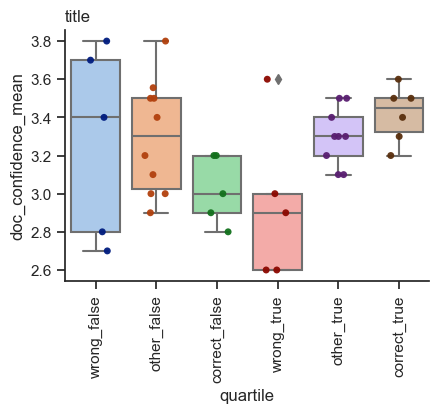

['wrong_false'] ['correct_false' 'other_false'] 0.895320183340838
['correct_false'] ['wrong_false' 'other_false'] 0.16047661064869223
['wrong_true'] ['other_true' 'correct_true'] 0.04740277626080587
['correct_true'] ['other_true' 'wrong_true'] 0.08783502965826888


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


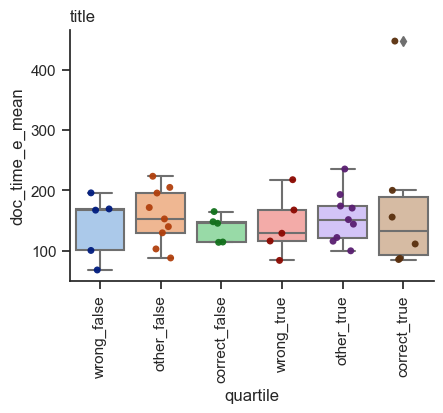

['wrong_false'] ['correct_false' 'other_false'] nan
['correct_false'] ['wrong_false' 'other_false'] nan
['wrong_true'] ['other_true' 'correct_true'] 0.7354231166150671
['correct_true'] ['other_true' 'wrong_true'] 0.7790505675954593


In [646]:
for dimensione in dimensioni_da_analizzare:
    crea_boxplot_e_stripplot(df_all_con_medie, "quartile", dimensione[:-6]+"_mean")
    calcola_test_mann(df_all_con_medie, dimensione[:-6]+"_mean")

### Tempo impiegato

In [647]:
df_all[["doc_id","mean","sovra","doc_time_elapsed"]]

,doc_id,mean,sovra,doc_time_elapsed
0,joni-ernst-target-describing-11th-hour-obama-r...,3.4,other,171.42
1,gop-challenger-overstates-parole-boards-record...,1.4,other,156.75
2,greene-twists-logic-and-facts-pedophilia-charg...,1.2,pants-on-fire,15.74
3,barnes-partially-right-claim-johnson-has-recei...,2.6,other,34.99
4,david-jolly-says-kathleen-peters-wont-take-sta...,2.7,other,169.21
...,...,...,...,...
1194,fact-checking-bernie-sanders-attack-florida-go...,2.1,other,48.63
1195,marjorie-taylor-greene-shared-edited-image-hig...,1.1,other,74.60
1196,some-teachouts-donors-also-gave-super-pacs,3.2,true,162.34
1197,ron-desantis-exaggerates-outstanding-graduate-...,2.6,other,188.65


C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\647405546.py:4: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  ax = sns.stripplot(palette = "dark",x=x_dimensione, y=y_dimensione, data=df, jitter=0.2, size=5, order = order, alpha=0.95)


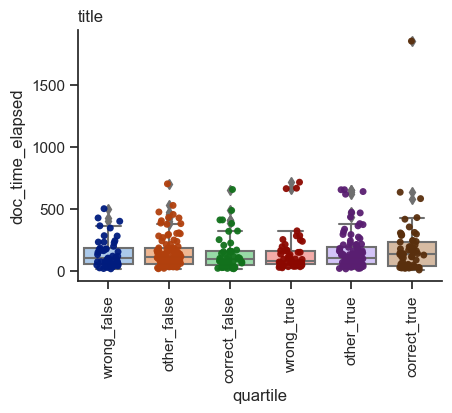

In [648]:
crea_boxplot_e_stripplot(df_all, "quartile", "doc_time_elapsed")

ci sono tanti outliers => rimuoviamoli

uso interquartili

In [649]:
df = df_all.copy()

In [650]:
index_names

Int64Index([118, 544, 588, 636, 736, 765], dtype='int64')

C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\952122143.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(palette = "dark",x="quartile", y="doc_time_elapsed", data=df, jitter=0.2, size=5, alpha=0.95,ax = ax[i])
C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\952122143.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(palette = "dark",x="quartile", y="doc_time_elapsed", data=df, jitter=0.2, size=5, alpha=0.95,ax = ax[i])
C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\952122143.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(palette = "dark",x="quartile", y="doc_time_elapsed", data=df, jitter=0.2, size=5, alpha=0.95,ax = ax[i])
C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\952122143.py:21: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(palette = "dark",x="quartile", y="doc_time_elapsed", data=df, jit

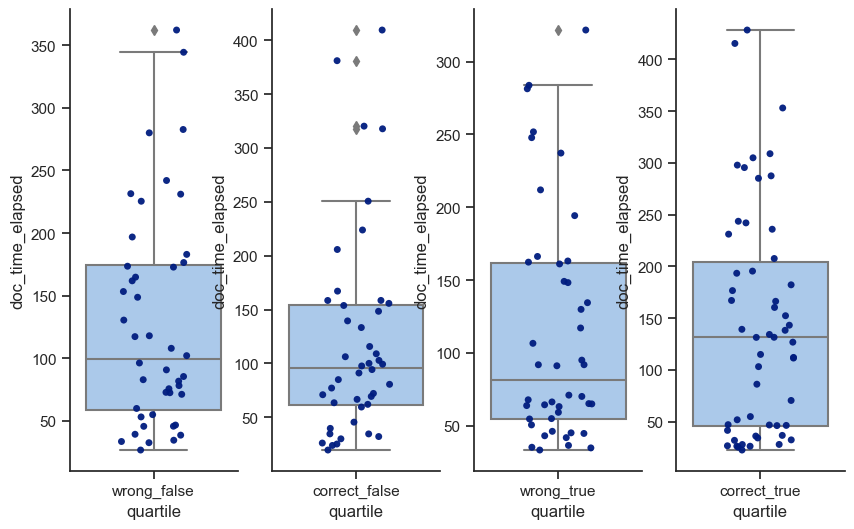

In [651]:
fig, ax = plt.subplots(nrows=1, ncols=4, figsize=(10,6))
i = 0

all_index_to_remove = []
for quartile in quartili:
    
    df = df_all.copy()
    
    df = df[df["quartile"] == quartile]

    time = df['doc_time_elapsed']
    removed_outliers = time.between(time.quantile(.05), time.quantile(.95))
    index_names = df[~removed_outliers].index # INVERT removed_outliers!!
    
    for index in index_names:
        all_index_to_remove.append(index)
    
    df.drop(index_names, inplace=True)
    
    sns.boxplot(palette = "pastel",x="quartile", y="doc_time_elapsed", data=df,ax = ax[i])
    sns.stripplot(palette = "dark",x="quartile", y="doc_time_elapsed", data=df, jitter=0.2, size=5, alpha=0.95,ax = ax[i])
    
    i = i+1
    
plt.show()    

In [652]:
all_index_to_remove

[2,
 228,
 283,
 511,
 632,
 735,
 254,
 348,
 596,
 769,
 919,
 1076,
 36,
 442,
 474,
 713,
 863,
 915,
 118,
 544,
 588,
 636,
 736,
 765]

In [653]:
df = df_all.copy()
df.drop(all_index_to_remove, inplace=True)
df = df[(df["quartile"] != "other") & (df["quartile"] != "other_true") & (df["quartile"] != "other_false")]

C:\Users\gabri\AppData\Local\Temp\ipykernel_10408\833004041.py:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.stripplot(palette = "dark",x="quartile", y="doc_time_elapsed", data=df, jitter=0.2, size=5, alpha=0.95)


<Axes: xlabel='quartile', ylabel='doc_time_elapsed'>

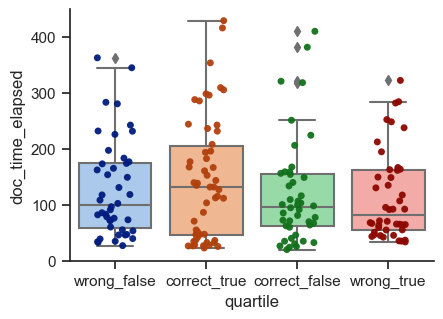

In [654]:
sns.boxplot(palette = "pastel",x="quartile", y="doc_time_elapsed", data=df)
sns.stripplot(palette = "dark",x="quartile", y="doc_time_elapsed", data=df, jitter=0.2, size=5, alpha=0.95)
    

In [655]:
calcola_test_mann(df, "doc_time_elapsed")

['wrong_false'] ['correct_false' 'other_false'] 0.923724918398048
['correct_false'] ['wrong_false' 'other_false'] 0.4283295783181348
['wrong_true'] ['other_true' 'correct_true'] 0.7739376469563977
['correct_true'] ['other_true' 'wrong_true'] 0.9818490635297423
